In [ ]:
# Importing the required libraries
import nltk 
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  #encoding=('ISO-8859-1')df.to_csv('C:\\Users\\acer\\Downloads\\youtube_data.csv', header=False)
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/youtube_data11.csv',encoding=('ISO-8859-1'))
df.head(1)

,channelName,channelUrl,date,dislikes,duration,id,likes,numberOfSubscribers,title,url,viewCount,Unnamed: 11
0,Programming with Mosh,https://www.youtube.com/channel/UCWv7vMbMWH4-V...,2019-02-18T00:00:00+00:00,4400,6:14:07,_uQrJ0TkZlc,568000,1780000,Python Tutorial - Python for Beginners [Full C...,https://www.youtube.com/watch?v=_uQrJ0TkZlc,18699415,NaN


In [ ]:
# Calculate mean of vote average column
C = df['likes'].mean()
print(C)

12545.519553072625


In [ ]:
# Calculate the minimum number of votes required to be in the chart, m
m = df['likes'].quantile(0.410)
print(m)

409.76


In [ ]:
you_tube = df.copy().loc[df['likes'] >= m]
you_tube.shape

(317, 12)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [ ]:
df.groupby('title')['likes'].mean().sort_values(ascending=False).head()

title
Study Music Alpha Waves: Relaxing Studying Music, Brain Power, Focus Concentration Music, ?161      899000.0
Learn Python - Full Course for Beginners [Tutorial]                                                 608000.0
Python Tutorial - Python for Beginners [Full Course]                                                568000.0
But what is a neural network? | Chapter 1, Deep learning                                            237000.0
Super Intelligence: ? Memory Music, Improve Memory and Concentration, Binaural Beats Focus Music    197000.0
Name: likes, dtype: float64

In [ ]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt


In [ ]:
import re
# remove twitter handles (@user)
df['clear_name'] = np.vectorize(remove_pattern)(df['title'], "@[\w]*")
# remove special characters, numbers and punctuations
df['clear_name'] = df['clear_name'].str.replace("[^a-zA-Z#]", " ")
# remove short words
df['clear_name'] = df['clear_name'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
# individual words considered as tokens
tokenized_tweet = df['clear_name'].apply(lambda x: x.split())

In [ ]:
df.head()['clear_name']

0         Python Tutorial Python Beginners Full Course
1    Python Tutorial Absolute Beginners What Variables
2    Python Tutorial Beginners Learn Python Hours F...
3                            Python Beginners Tutorial
4                                 Everyone Should Code
Name: clear_name, dtype: object

In [ ]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0        [python, tutori, python, beginn, full, cours]
1     [python, tutori, absolut, beginn, what, variabl]
2    [python, tutori, beginn, learn, python, hour, ...
3                             [python, beginn, tutori]
4                              [everyon, should, code]
Name: clear_name, dtype: object

In [ ]:
pip install rake-nltk


  Created wheel for rake-nltk: filename=rake_nltk-1.0.4-py2.py3-none-any.whl size=7829 sha256=2b08ddc1e43cb928d01882e68f782f27b6218ade2dc29e66ce88a3824bd26dcb
  Stored in directory: /root/.cache/pip/wheels/ef/92/fc/271b3709e71a96ffe934b27818946b795ac6b9b8ff8682483f
Successfully built rake-nltk


In [ ]:
# import RAKE
# from rake_nltk import Rake

# rake_nltk_var = Rake()
# text = """spaCy is an open-source software library for advanced natural language processing,
# written in the programming languages Python and Cython. The library is published under the MIT license
# and its main developers are Matthew Honnibal and Ines Montani, the founders of the software company Explosion."""

# rake_nltk_var.extract_keywords_from_text(text)
# keyword_extracted = rake_nltk_var.get_ranked_phrases()
# print(keyword_extracted)

In [ ]:
type(text)

NameError: ignored

In [ ]:
pip install WordCloud

In [ ]:
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud

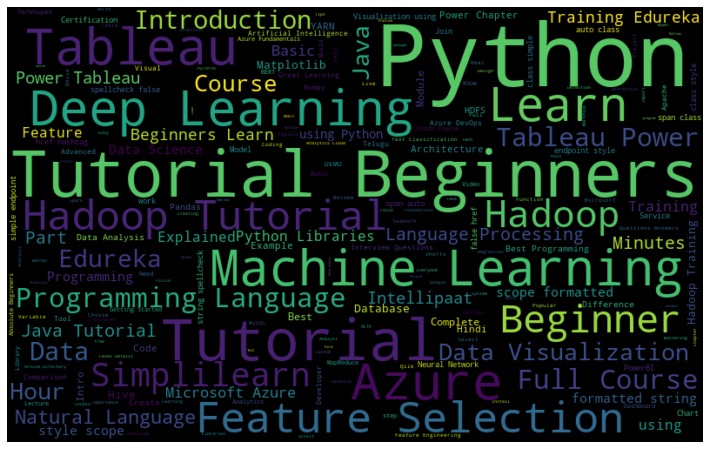

In [ ]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clear_name']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
dataset=df


In [ ]:
dataset.head()


,channelName,channelUrl,date,dislikes,duration,id,likes,numberOfSubscribers,title,url,viewCount,Unnamed: 11,clear_name
0,Programming with Mosh,https://www.youtube.com/channel/UCWv7vMbMWH4-V...,2019-02-18T00:00:00+00:00,4400,6:14:07,_uQrJ0TkZlc,568000,1780000,Python Tutorial - Python for Beginners [Full C...,https://www.youtube.com/watch?v=_uQrJ0TkZlc,18699415,NaN,Python Tutorial Python Beginners Full Course
1,CS Dojo,https://www.youtube.com/channel/UCxX9wt5FWQUAA...,2017-12-26T00:00:00+00:00,2000,24:38:00,Z1Yd7upQsXY,149000,1670000,Python Tutorial for Absolute Beginners #1 - Wh...,https://www.youtube.com/watch?v=Z1Yd7upQsXY,6722234,NaN,Python Tutorial Absolute Beginners What Variables
2,TechWorld with Nana,https://www.youtube.com/channel/UCdngmbVKX1Tgr...,2021-03-05T00:00:00+00:00,145,2:15,t8pPdKYpowI,21000,219000,Python Tutorial for Beginners - Learn Python i...,https://www.youtube.com/watch?v=t8pPdKYpowI,502252,NaN,Python Tutorial Beginners Learn Python Hours F...
3,Kevin Stratvert,https://www.youtube.com/channel/UCfJT_eYDTmDE-...,2021-03-25T00:00:00+00:00,33,1:03:21,b093aqAZiPU,3100,739000,??? Python for Beginners Tutorial,https://www.youtube.com/watch?v=b093aqAZiPU,77132,NaN,Python Beginners Tutorial
4,PolyMatter,https://www.youtube.com/channel/UCgNg3vwj3xt7Q...,2018-04-20T00:00:00+00:00,8600,1:00,EFwa5Owp0-k,97000,1390000,Not Everyone Should Code,https://www.youtube.com/watch?v=EFwa5Owp0-k,3089955,NaN,Everyone Should Code


In [ ]:
#Fetch wordcount for each abstract
dataset['word_count'] = dataset['clear_name'].apply(lambda x: len(str(x).split(" ")))
dataset[['clear_name','word_count']].head()

,clear_name,word_count
0,Python Tutorial Python Beginners Full Course,6
1,Python Tutorial Absolute Beginners What Variables,6
2,Python Tutorial Beginners Learn Python Hours F...,8
3,Python Beginners Tutorial,3
4,Everyone Should Code,3


In [ ]:
##Descriptive statistics of word counts
dataset.word_count.describe()

count    537.000000
mean       6.878957
std        4.289681
min        1.000000
25%        4.000000
50%        6.000000
75%        9.000000
max       53.000000
Name: word_count, dtype: float64

In [ ]:
import pandas 

In [ ]:
#Identify common words
freq = pandas.Series(' '.join(dataset['clear_name']).split()).value_counts()[:20]
freq


Tutorial       217
Beginners      136
Python         130
Tableau        103
Learning       102
Hadoop          90
Azure           85
Data            74
Learn           58
Course          57
Machine         55
Power           53
Feature         52
Deep            51
Programming     50
Training        46
Edureka         45
Java            42
with            42
Selection       42
dtype: int64

In [ ]:
#Identify uncommon words
freq1 =  pandas.Series(' '.join(dataset 
         ['clear_name']).split()).value_counts()[-20:]
freq1

AutoML          1
Internet        1
Start           1
really          1
Professional    1
WITH            1
Unsupervised    1
MACHINE         1
Subset          1
absolute        1
Battle          1
Pass            1
Oracle          1
Structured      1
execution       1
architecture    1
tables          1
MISSED          1
Living          1
About           1
dtype: int64

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "inversely"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

stemming: invers
lemmatization: inversely


In [ ]:
# Libraries for text preprocessing
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

In [ ]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
stop_words = stop_words.union(new_words)

In [ ]:
corpus = []
for i in range(0,536):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', dataset['clear_name'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [ ]:
#View corpus item
corpus[357]

'data introduction data hadoop tutorial beginner hadoop part'

In [ ]:
corpus

AttributeError: ignored

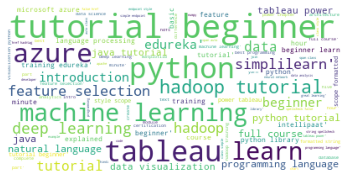

In [ ]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [ ]:
list(cv.vocabulary_.keys())[:10]

['python',
 'tutorial',
 'beginner',
 'full',
 'course',
 'python tutorial',
 'tutorial python',
 'python beginner',
 'beginner full',
 'full course']

[Text(0, 0, 'tutorial'),
 Text(0, 0, 'beginner'),
 Text(0, 0, 'python'),
 Text(0, 0, 'learning'),
 Text(0, 0, 'tableau'),
 Text(0, 0, 'hadoop'),
 Text(0, 0, 'azure'),
 Text(0, 0, 'data'),
 Text(0, 0, 'learn'),
 Text(0, 0, 'feature'),
 Text(0, 0, 'course'),
 Text(0, 0, 'language'),
 Text(0, 0, 'machine'),
 Text(0, 0, 'programming'),
 Text(0, 0, 'power'),
 Text(0, 0, 'deep'),
 Text(0, 0, 'java'),
 Text(0, 0, 'selection'),
 Text(0, 0, 'training'),
 Text(0, 0, 'edureka')]

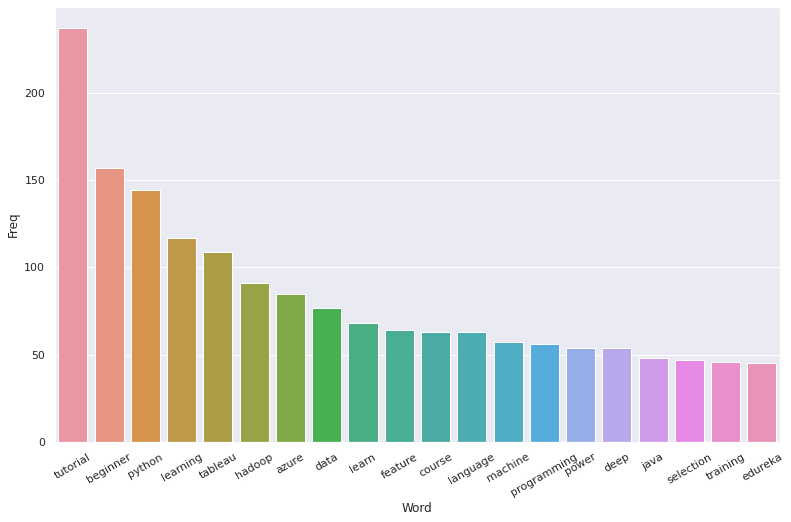

In [ ]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pandas.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                 Bi-gram  Freq
0      tutorial beginner    98
1       machine learning    55
2          deep learning    53
3      feature selection    45
4        hadoop tutorial    43
5   programming language    34
6            full course    33
7          tableau power    30
8        python tutorial    27
9     data visualization    26
10      natural language    25
11   language processing    24
12         java tutorial    22
13        python library    20
14      training edureka    18
15        azure tutorial    18
16  visualization python    17
17       microsoft azure    17
18         power tableau    16
19        beginner learn    14


[Text(0, 0, 'tutorial beginner'),
 Text(0, 0, 'machine learning'),
 Text(0, 0, 'deep learning'),
 Text(0, 0, 'feature selection'),
 Text(0, 0, 'hadoop tutorial'),
 Text(0, 0, 'programming language'),
 Text(0, 0, 'full course'),
 Text(0, 0, 'tableau power'),
 Text(0, 0, 'python tutorial'),
 Text(0, 0, 'data visualization'),
 Text(0, 0, 'natural language'),
 Text(0, 0, 'language processing'),
 Text(0, 0, 'java tutorial'),
 Text(0, 0, 'python library'),
 Text(0, 0, 'training edureka'),
 Text(0, 0, 'azure tutorial'),
 Text(0, 0, 'visualization python'),
 Text(0, 0, 'microsoft azure'),
 Text(0, 0, 'power tableau'),
 Text(0, 0, 'beginner learn')]

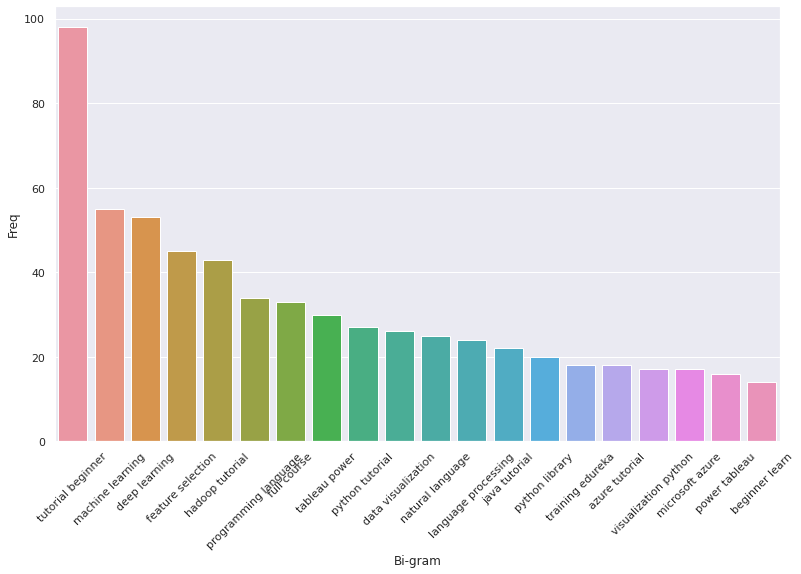

In [ ]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pandas.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                             Tri-gram  Freq
0         natural language processing    24
1              java tutorial beginner    20
2            hadoop tutorial beginner    19
3            python tutorial beginner    16
4           data visualization python    16
..                                ...   ...
532  certification best certification     1
533    best certification simplilearn     1
534        dying programming language     1
535       programming language clever     1
536        language clever programmer     1

[537 rows x 2 columns]


[Text(0, 0, 'natural language processing'),
 Text(0, 0, 'java tutorial beginner'),
 Text(0, 0, 'hadoop tutorial beginner'),
 Text(0, 0, 'python tutorial beginner'),
 Text(0, 0, 'data visualization python'),
 Text(0, 0, 'style scope formatted'),
 Text(0, 0, 'scope formatted string'),
 Text(0, 0, 'programming language learn'),
 Text(0, 0, 'azure tutorial beginner'),
 Text(0, 0, 'tutorial beginner learn'),
 Text(0, 0, 'tutorial beginner edureka'),
 Text(0, 0, 'tableau power chapter'),
 Text(0, 0, 'best programming language'),
 Text(0, 0, 'learning deep learning'),
 Text(0, 0, 'tutorial beginner hadoop'),
 Text(0, 0, 'hadoop training edureka'),
 Text(0, 0, 'full course learn'),
 Text(0, 0, 'span auto class'),
 Text(0, 0, 'auto class style'),
 Text(0, 0, 'class style scope'),
 Text(0, 0, 'span class simple'),
 Text(0, 0, 'class simple endpoint'),
 Text(0, 0, 'simple endpoint style'),
 Text(0, 0, 'endpoint style scope'),
 Text(0, 0, 'formatted string spellcheck'),
 Text(0, 0, 'string spellch

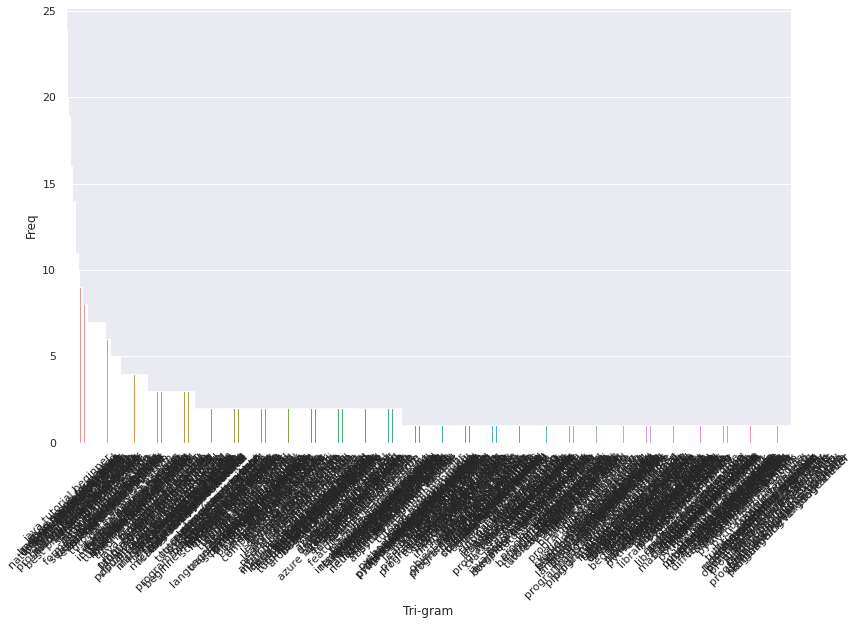

In [ ]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=537)
top3_df = pandas.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [ ]:
top3_df.head()


,Tri-gram,Freq
0,natural language processing,24
1,java tutorial beginner,20
2,hadoop tutorial beginner,19
3,python tutorial beginner,16
4,data visualization python,16


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[532]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [ ]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# now print the results
print("\Recommented:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])

\Recommented:
tutorial text summarization

Keywords:
tutorial text summarization 0.463
tutorial text 0.463
text summarization 0.463
summarization 0.463
text 0.35


In [ ]:
top3_df.to_csv('/content/drive/MyDrive/keywords.csv')

In [ ]:
top3_df

,Tri-gram,Freq
0,natural language processing,24
1,java tutorial beginner,20
2,hadoop tutorial beginner,19
3,python tutorial beginner,16
4,data visualization python,16
...,...,...
532,certification best certification,1
533,best certification simplilearn,1
534,dying programming language,1
535,programming language clever,1


In [ ]:
data=(str(corpus))